In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import re
from difflib import get_close_matches


In [3]:
train = pd.read_csv('./files/train.csv')
test = pd.read_csv('./files/test.csv')
submission = pd.read_csv('./files/submission_sample.csv')


In [4]:
train.describe()

,Total Working Experience,Expected Benefit Botom,Expected Benefit Up,Estimate Bottom,Estimate Up
count,1160.000000,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03
mean,3.126724,4.212931e+05,1.681897e+05,7.602155e+06,1.182543e+07
std,2.830618,2.148195e+06,1.413114e+06,3.705119e+06,6.002688e+06
min,0.000000,0.000000e+00,0.000000e+00,2.500000e+06,4.000000e+06
25%,1.000000,0.000000e+00,0.000000e+00,5.000000e+06,8.000000e+06
50%,3.000000,0.000000e+00,0.000000e+00,8.000000e+06,1.200000e+07
75%,4.000000,0.000000e+00,0.000000e+00,8.000000e+06,1.200000e+07
max,19.000000,2.150000e+07,2.300000e+07,3.500000e+07,5.500000e+07


In [5]:
train['ID'].is_unique

True

No Data duplicates, nice

In [7]:
#Seperating Numerical and Categorical Columns
num_cols = [
    "Total Working Experience",
    "Expected Benefit Botom",
    "Expected Benefit Up",
    "Estimate Bottom",
    "Estimate Up",
]

cat_cols = [
    "ID",
    "Current Position",
    "Targeted Position",
    "Candidate Level",
    "Domisili",
    "Education 1",
    "Education 2",
    "Education 3",
    "Notice Period",
    "Tech Stack",
    "Certification",
]

Missing Values in Numerical Columns:
                          Missing Values  Missing Percentage
Total Working Experience               0                 0.0
Expected Benefit Botom                 0                 0.0
Expected Benefit Up                    0                 0.0
Estimate Bottom                        0                 0.0
Estimate Up                            0                 0.0


Missing Values in Categorical Columns:
                   Missing Values  Missing Percentage
Notice Period                1103           95.086207
Education 3                  1031           88.879310
Targeted Position             958           82.586207
Education 2                   629           54.224138
Certification                 359           30.948276
Current Position              141           12.155172
Domisili                       99            8.534483
Education 1                    18            1.551724
Tech Stack                      5            0.431034
ID              

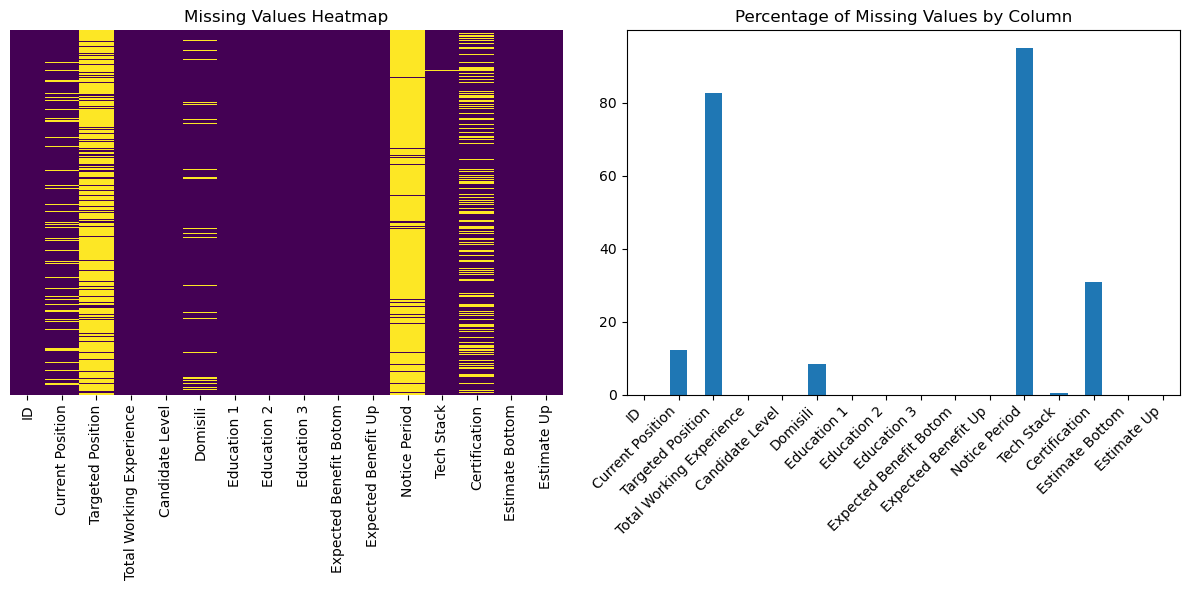

In [8]:
# Check missing values percentage by column
def check_missing_values(df):
    missing = df.isnull().sum()
    missing_pct = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Missing Percentage': missing_pct
    }).sort_values('Missing Percentage', ascending=False)
    return missing_df

# Separate analysis for numerical and categorical columns
def analyze_missing_by_type(df, num_cols, cat_cols):
    # Numerical columns
    num_missing = check_missing_values(df[num_cols])
    print("Missing Values in Numerical Columns:")
    print(num_missing)
    print("\n")
    
    # Categorical columns  
    cat_missing = check_missing_values(df[cat_cols])
    print("Missing Values in Categorical Columns:")
    print(cat_missing)


def analyze_missing_patterns(df):
    # Cross tabulate missingness with Candidate Level
    level_missing = pd.crosstab(df['Candidate Level'].isnull(), 
                               df['Targeted Position'].isnull(),
                               normalize='index')
    print("Missing Pattern Analysis - Candidate Level vs Targeted Position:")
    print(level_missing)


def handle_education_missing(df):
    edu_cols = ['Education 1', 'Education 2', 'Education 3']
    df[edu_cols] = df[edu_cols].fillna('None')
    return df

def plot_missing_patterns(df):
    plt.figure(figsize=(12,6))
    
    # Heatmap
    plt.subplot(1,2,1)
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    
    # Bar plot
    plt.subplot(1,2,2)
    missing_pct = df.isnull().mean() * 100
    missing_pct.plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

analyze_missing_by_type(train, num_cols, cat_cols)
analyze_missing_patterns(train)
train = handle_education_missing(train)
plot_missing_patterns(train)

In [9]:
train

,ID,Current Position,Targeted Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Education 3,Expected Benefit Botom,Expected Benefit Up,Notice Period,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,NaN,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,None,0,0,NaN,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...","[""Junior Web Developer, Digitalent Scholarship...",6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,NaN,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,None,None,0,0,NaN,"Laravel, Phalcon, Python, Django, Next.Js, Tai...","[""Google Data Analytics, Coursera Jul 2023"",""L...",8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,NaN,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,None,0,0,NaN,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...","[""Full-stack Web Developer""]",4000000.0,6000000.0
3,SKU-JANU420,Java Developer,NaN,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",None,None,0,0,NaN,"React, JavaScript, Mobile Application Software...",[],6000000.0,9000000.0
4,SKU-NUNU1182,NaN,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",None,None,0,0,NaN,"PHP, Python, Java, Javascript, Go, C#, Laravel...",[],8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,NaN,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",None,0,0,NaN,"HTML / CSS, TypeScript, JavaScript, Angular, R...",[],8000000.0,12000000.0
1156,SKU-FRNU1147,Front End Web Developer,NaN,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,None,None,0,0,NaN,"Graphql, Typescript + React, HTML 5, CSS 3, Ja...","[""Belajar Dasar Pemrograman Web - Dicoding Aca...",6000000.0,9000000.0
1157,SKU-SONU1312,Software Engineer,NaN,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,None,None,0,0,NaN,"CSS, HTML, JAVASCRIPT, TYPESCRIPT, PHP, GO, LA...",[],8000000.0,12000000.0
1158,SKU-IONU877,iOS Developer,NaN,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",None,None,0,0,NaN,"SwiftUI, UIKit, Core Data, Core Animation, Cor...",[],12000000.0,18000000.0


In [8]:
# see existing values in candidate level 
print(train['Candidate Level'].value_counts())

Candidate Level
Mid-Level      652
Junior         429
Senior          60
Entry-Level     18
Fresher          1
Name: count, dtype: int64


In [9]:
# remove domicile column, unlikely to be useful
train = train.drop(columns=['Domisili'])
test = test.drop(columns=['Domisili'])
# mapping candidate level, fresher = entry level (1), junior = 2, mid-level = 3 , senior = 4
level_mapping = {
    'Fresher': 1,
    'Entry Level': 1,
    'Junior': 2,
    'Mid-Level': 3,
    'Senior': 4
}
train['Candidate Level'] = train['Candidate Level'].map(level_mapping)
test['Candidate Level'] = test['Candidate Level'].map(level_mapping)

# Mapping empty current position, target position, notice period to "None" 
train['Current Position'] = train['Current Position'].fillna('None')
train['Targeted Position'] = train['Targeted Position'].fillna('None')
train['Notice Period'] = train['Notice Period'].fillna('None')
test['Current Position'] = test['Current Position'].fillna('None')
test['Targeted Position'] = test['Targeted Position'].fillna('None')
test['Notice Period'] = test['Notice Period'].fillna('None')




In [10]:
train.head()

,ID,Current Position,Targeted Position,Total Working Experience,Candidate Level,Education 1,Education 2,Education 3,Expected Benefit Botom,Expected Benefit Up,Notice Period,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,None,2,2.0,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,None,0,0,None,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...","[""Junior Web Developer, Digitalent Scholarship...",6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,None,1,3.0,Padjadjaran University 2017-2021,None,None,0,0,None,"Laravel, Phalcon, Python, Django, Next.Js, Tai...","[""Google Data Analytics, Coursera Jul 2023"",""L...",8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,None,0,2.0,Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,None,0,0,None,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...","[""Full-stack Web Developer""]",4000000.0,6000000.0
3,SKU-JANU420,Java Developer,None,0,2.0,"Bachelor's degree, Universitas Pendidikan Indo...",None,None,0,0,None,"React, JavaScript, Mobile Application Software...",[],6000000.0,9000000.0
4,SKU-NUNU1182,None,None,4,3.0,"Ilmu Komputer, Universitas Pendidikan Indonesi...",None,None,0,0,None,"PHP, Python, Java, Javascript, Go, C#, Laravel...",[],8000000.0,12000000.0


In [11]:
# standardizing tech stack and certification columns 
def standardize_tech_cert(df):
    # Standardize Tech Stack
    df['Tech Stack'] = df['Tech Stack'].str.lower().str.replace(r'[^a-z0-9, ]', '', regex=True)
    df['Tech Stack'] = df['Tech Stack'].str.replace(r'\s*,\s*', ',', regex=True)  # Remove spaces around commas
    df['Tech Stack'] = df['Tech Stack'].str.replace(r'\s+', ' ', regex=True).str.strip()  # Remove extra spaces
    
    # Standardize Certification
    df['Certification'] = df['Certification'].str.lower().str.replace(r'[^a-z0-9, ]', '', regex=True)
    df['Certification'] = df['Certification'].str.replace(r'\s*,\s*', ',', regex=True)  # Remove spaces around commas
    df['Certification'] = df['Certification'].str.replace(r'\s+', ' ', regex=True).str.strip()  # Remove extra spaces
    
    return df

train = standardize_tech_cert(train)
test = standardize_tech_cert(test)
test.head()

,ID,Current Position,Targeted Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Education 3,Expected Benefit Botom,Expected Benefit Up,Notice Period,Tech Stack,Certification
0,SKU-WENU549,Web Developer,NaN,2,Junior,Ciamis,"Universitas Nurtanio Bandung, S1 Teknik Inform...",NaN,NaN,0,0,NaN,"javascript,java,react js,react native,vue js,p...","css hackerrank july 2022,mtcna mikrotik april ..."
1,SKU-NUNU771,NaN,NaN,0,Junior,Tangerang,Institut Teknologi Indonesia\n2019 - 2023\nTek...,SMK Penerbangan Dirghantara\n2015 - 2018\nAirf...,NaN,0,0,NaN,"java,typescript,angular,react nextjs,postgresq...","excel associate,excel expert,it specialist dat..."
2,SKU-COBA050,Controls Engineer,Backend Developer,3,Mid-Level,Bekasi,"Telkom University, Electronics Engineering, 2020","SMAI Nurul Fikri Boarding School, Science, 2016","SMPI Nurul Fikri Boarding School, null, 2013",0,0,NaN,"net,net core,bootstrap,github,gitlab,vuejs,mic...",kelas pemrograman arduino indobot academy expi...
3,SKU-FLNU1398,Flutter Middle Mobile Developer,NaN,3,Mid-Level,"Samarinda, Indonesia",2014 - 2019\nBachelor of Computer Science\nINS...,NaN,NaN,0,0,NaN,"flutter,bloc,firebase,google maps,camera,image...",menjadi ios developer expert by dicoding indon...
4,SKU-FUBA143,Fullstack Developer,Backend Developer,4,Mid-Level,"Bandung City, West Java","Langlangbuana University, Bandung, S1, Major i...",NaN,NaN,0,0,NaN,"golang,javascript,php,nestjs,nextjs,react nati...",


In [12]:
#create new columns for tech stack and certification count 
def create_count_columns(df):
    df['Certification Count'] = df['Certification'].apply(lambda x: len(x.split(',')) if pd.notnull(x) and x != 'none' else 0)
    return df

train = create_count_columns(train)
test = create_count_columns(test)
test.head()

,ID,Current Position,Targeted Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Education 3,Expected Benefit Botom,Expected Benefit Up,Notice Period,Tech Stack,Certification,Certification Count
0,SKU-WENU549,Web Developer,NaN,2,Junior,Ciamis,"Universitas Nurtanio Bandung, S1 Teknik Inform...",NaN,NaN,0,0,NaN,"javascript,java,react js,react native,vue js,p...","css hackerrank july 2022,mtcna mikrotik april ...",7
1,SKU-NUNU771,NaN,NaN,0,Junior,Tangerang,Institut Teknologi Indonesia\n2019 - 2023\nTek...,SMK Penerbangan Dirghantara\n2015 - 2018\nAirf...,NaN,0,0,NaN,"java,typescript,angular,react nextjs,postgresq...","excel associate,excel expert,it specialist dat...",6
2,SKU-COBA050,Controls Engineer,Backend Developer,3,Mid-Level,Bekasi,"Telkom University, Electronics Engineering, 2020","SMAI Nurul Fikri Boarding School, Science, 2016","SMPI Nurul Fikri Boarding School, null, 2013",0,0,NaN,"net,net core,bootstrap,github,gitlab,vuejs,mic...",kelas pemrograman arduino indobot academy expi...,6
3,SKU-FLNU1398,Flutter Middle Mobile Developer,NaN,3,Mid-Level,"Samarinda, Indonesia",2014 - 2019\nBachelor of Computer Science\nINS...,NaN,NaN,0,0,NaN,"flutter,bloc,firebase,google maps,camera,image...",menjadi ios developer expert by dicoding indon...,2
4,SKU-FUBA143,Fullstack Developer,Backend Developer,4,Mid-Level,"Bandung City, West Java","Langlangbuana University, Bandung, S1, Major i...",NaN,NaN,0,0,NaN,"golang,javascript,php,nestjs,nextjs,react nati...",,1


In [14]:
# show entire train dataset
# feat_train = train["ID", "Current Position", "Total Working Experience", "Candidate Level", "Tech Stack", "Certification", "Certification Count", "Estimate Bottom"]
train_feat = train[["ID", "Current Position", "Total Working Experience", "Candidate Level", "Tech Stack", "Certification", "Certification Count", "Estimate Bottom", "Estimate Up"]]
test_feat = test[["ID", "Current Position", "Total Working Experience", "Candidate Level", "Tech Stack", "Certification", "Certification Count"]]
test_feat

,ID,Current Position,Total Working Experience,Candidate Level,Tech Stack,Certification,Certification Count
0,SKU-WENU549,Web Developer,2,Junior,"javascript,java,react js,react native,vue js,p...","css hackerrank july 2022,mtcna mikrotik april ...",7
1,SKU-NUNU771,NaN,0,Junior,"java,typescript,angular,react nextjs,postgresq...","excel associate,excel expert,it specialist dat...",6
2,SKU-COBA050,Controls Engineer,3,Mid-Level,"net,net core,bootstrap,github,gitlab,vuejs,mic...",kelas pemrograman arduino indobot academy expi...,6
3,SKU-FLNU1398,Flutter Middle Mobile Developer,3,Mid-Level,"flutter,bloc,firebase,google maps,camera,image...",menjadi ios developer expert by dicoding indon...,2
4,SKU-FUBA143,Fullstack Developer,4,Mid-Level,"golang,javascript,php,nestjs,nextjs,react nati...",,1
...,...,...,...,...,...,...,...
285,SKU-UNNU584,Undergraduate student of Informatics Engineering,0,Junior,"frontend development,web development,javascript","intro to software engineering,belajar membuat ...",5
286,SKU-BANU1282,Backend Developer,2,Mid-Level,"laravel,php,expressjs,nodejs,gin,go,sql,docker",NaN,0
287,SKU-ANNU1310,Android Developer dan Fullstack Website Developer,2,Mid-Level,"html,css,javascript,tailwind css,react js,reac...",,1
288,SKU-HENU731,Head of IT Division,8,Senior,"java,php,nodejs,expressjs,restful api,angular,...",NaN,0


In [14]:
train_feat

,ID,Current Position,Total Working Experience,Candidate Level,Tech Stack,Certification,Certification Count,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,2,2.0,"html,css,javascriptreactjs,jquery,ajax,framewo...","junior web developer,digitalent scholarship,no...",3,6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,1,3.0,"laravel,phalcon,python,django,nextjs,tailwind ...","google data analytics,coursera jul 2023,learni...",14,8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,0,2.0,"javascript,prisma orm,typescript,mysql,reactjs...",fullstack web developer,1,4000000.0,6000000.0
3,SKU-JANU420,Java Developer,0,2.0,"react,javascript,mobile application software,d...",,1,6000000.0,9000000.0
4,SKU-NUNU1182,None,4,3.0,"php,python,java,javascript,go,c,laravel,echo,n...",,1,8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,3.0,"html css,typescript,javascript,angular,react j...",,1,8000000.0,12000000.0
1156,SKU-FRNU1147,Front End Web Developer,1,2.0,"graphql,typescript react,html 5,css 3,javascri...",belajar dasar pemrograman web dicoding academy...,9,6000000.0,9000000.0
1157,SKU-SONU1312,Software Engineer,3,3.0,"css,html,javascript,typescript,php,go,laravel,...",,1,8000000.0,12000000.0
1158,SKU-IONU877,iOS Developer,4,3.0,"swiftui,uikit,core data,core animation,core gr...",,1,12000000.0,18000000.0


In [15]:
DELIM_PATTERN = r"[;,/|]" 

def _clean_token(x: str) -> str:
    if x is None:
        return ""
    x = str(x)
    # remove brackets and extra punctuation often used to group skills
    x = re.sub(r"[\[\](){}]", " ", x)
    # replace connectors & extra punctuation with space
    x = re.sub(r"[\u2013\u2014]", "-", x)  # normalize dashes
    x = re.sub(r"[_+]", " ", x)
    # trim
    x = x.strip()
    # collapse internal whitespace
    x = re.sub(r"\s+", " ", x)
    return x
    
def _strip_versions(token: str) -> str:
    t = token
    # patterns like v16, v2.3, 3.x, 3.10, LTS
    t = re.sub(r"\bv?\d+(\.\d+)*\b", "", t, flags=re.IGNORECASE)
    t = re.sub(r"\b(LTS|x)\b", "", t, flags=re.IGNORECASE)
    t = re.sub(r"\s+", " ", t).strip()
    return t

def split_multi(text: str) -> list:
    if text is None or (isinstance(text, float) and pd.isna(text)):
        return []
    
    parts = re.split(DELIM_PATTERN, str(text))
    out = []
    for p in parts:
        p = _clean_token(p)
        if p:
            out.append(p)
    
    out2 = []
    for p in out:
        if re.search(r"\b(and|&)\b", p, flags=re.IGNORECASE):
            out2.extend([_clean_token(s) for s in re.split(r"\b(?:and|&)\b", p, flags=re.IGNORECASE)])
        else:
            out2.append(p)
    return [t for t in out2 if t]

SKILL_ALIASES = {
    "Python": ["py", "python3", "python 3", "python 2", "pyhton"],
    "JavaScript": ["js", "javascript", "ecmascript"],
    "TypeScript": ["ts", "typescript"],
    "Node.js": ["node", "nodejs", "node js", "node.js"],
    "React": ["reactjs", "react.js", "react js"],
    "Angular": ["angularjs", "angular js"],
    "Vue.js": ["vue", "vuejs", "vue js"],
    ".NET": [".net", "dotnet", ".net core", "net core", "asp.net", "asp net"],
    "Java": ["java se", "java ee", "jdk", "jre"],
    "Spring": ["spring boot", "springboot"],
    "Kotlin": [],
    "Swift": [],
    "C": [],
    "C++": ["cpp", "c plus plus"],
    "C#": ["c sharp", "c-sharp"],
    "Go": ["golang"],
    "PHP": [],
    "Ruby": ["ruby on rails", "rails"],
    "SQL": ["mysql", "postgresql", "postgres", "oracle sql", "mssql", "sql server"],
    "NoSQL": ["mongodb", "cassandra", "dynamodb", "couchbase", "redis"],
    "HTML/CSS": ["html", "css", "html5", "css3", "sass", "less"],
    "Docker": [],
    "Kubernetes": ["k8s"],
    "Git": ["gitlab", "github", "bitbucket"],
    "Linux": ["gnu/linux", "ubuntu", "debian", "centos", "rhel"],
    "AWS": ["amazon web services", "amazon aws"],
    "Azure": ["microsoft azure"],
    "Google Cloud": ["gcp", "google cloud platform"],
    "Terraform": ["iac", "hashicorp terraform"],
    "Ansible": [],
    "Airflow": ["apache airflow"],
    "Hadoop": [],
    "Spark": ["apache spark", "pyspark"],
    "Snowflake": [],
    "Databricks": [],
    "Power BI": ["powerbi"],
    "Tableau": [],
    "scikit-learn": ["sklearn"],
    "TensorFlow": ["tf", "tensorflow 2"],
    "PyTorch": ["pytorch lightning", "torch"],
    "OpenCV": [],
    "NLP": ["spacy", "nltk", "transformers", "huggingface"],
    "Elasticsearch": ["elastic", "elk"],
    "RabbitMQ": ["mq", "message queue"],
    "Grafana": [],
    "Prometheus": [],
    "Jenkins": [],
    "CI/CD": ["cicd", "continuous integration", "continuous delivery"],
    "REST": ["rest api", "restful"],
    "GraphQL": [],
    "Microservices": ["micro services", "micro-service"],
    "Agile/Scrum": ["agile", "scrum"],
}

# Build reverse lookup from alias->canonical
_ALIAS_TO_SKILL = {}
for canonical, synonyms in SKILL_ALIASES.items():
    names = {canonical} | set(synonyms)
    for n in names:
        _ALIAS_TO_SKILL[n.lower()] = canonical

# fuzzy fallback candidates (canonical names)
_SKILL_CANONICAL_SET = set(SKILL_ALIASES.keys())

def normalize_skill(token: str, fuzzy=True, cutoff=0.88) -> str:
    """Map a raw token to a canonical skill name."""
    t = _strip_versions(_clean_token(token))
    if not t:
        return ""
    low = t.lower()
    if low in _ALIAS_TO_SKILL:
        return _ALIAS_TO_SKILL[low]
    # handle compound tokens commonly paired
    if low in {"html", "css", "html css", "css html"}:
        return "HTML/CSS"
    # fuzzy match last resort
    if fuzzy:
        match = get_close_matches(t, list(_SKILL_CANONICAL_SET), n=1, cutoff=cutoff)
        if match:
            return match[0]
    # Title-case fallback to make it neat
    return t.title()

def standardize_tech_stack(series: pd.Series, fuzzy=True) -> pd.Series:
    """
    Input: pd.Series of strings (multi-value)
    Output: pd.Series of lists of canonical skills
    """
    normalized = []
    for cell in series.fillna(""):
        tokens = split_multi(cell)
        tokens = [_strip_versions(t) for t in tokens]
        mapped = []
        for t in tokens:
            
            if re.search(r"\bhtml\s*/?\s*css\b", t, flags=re.IGNORECASE):
                mapped.append("HTML/CSS")
            else:
                mapped.append(normalize_skill(t, fuzzy=fuzzy))
        
        seen = set()
        uniq = []
        for m in mapped:
            if m and m not in seen:
                uniq.append(m)
                seen.add(m)
        normalized.append(uniq)
    return pd.Series(normalized, index=series.index)

# apply all for train dataset only
if "Tech Stack" in train.columns:
    train_feat["tech_tokens"] = standardize_tech_stack(train_feat["Tech Stack"], fuzzy=True)
    test_feat["tech_tokens"] = standardize_tech_stack(test_feat["Tech Stack"], fuzzy=True)
else:
    train_feat["tech_tokens"] = [[] for _ in range(len(train_feat))]
    test_feat["tech_tokens"] = [[] for _ in range(len(test_feat))]
    


/tmp/ipykernel_15942/2586305442.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feat["tech_tokens"] = standardize_tech_stack(train_feat["Tech Stack"], fuzzy=True)
/tmp/ipykernel_15942/2586305442.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_feat["tech_tokens"] = standardize_tech_stack(test_feat["Tech Stack"], fuzzy=True)


In [16]:
if "Tech Stack" in test.columns:
    test["tech_tokens"] = standardize_tech_stack(test["Tech Stack"], fuzzy=True)
else:
    test["tech_tokens"] = [[] for _ in range(len(test))]

One-hot encoding for tech stack

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

if "Tech Stack" in train_feat.columns:
    train_feat = train_feat.copy()
    train_feat["tech_tokens"] = standardize_tech_stack(train_feat["Tech Stack"], fuzzy=True)
else:
    train_feat["tech_tokens"] = [[] for _ in range(len(train_feat))]
    test_feat["tech_tokens"] = [[] for _ in range(len(test_feat))]

# 2) (Optional but recommended) keep only top-K most frequent skills to reduce dimensionality
TOP_K = 50           # tune this
MIN_COUNT = 5        # minimum frequency to keep a skill

cnt = Counter()
for lst in train_feat["tech_tokens"]:
    cnt.update(lst)

# choose the skills to keep
kept_skills = [tok for tok, c in cnt.most_common() if c >= MIN_COUNT][:TOP_K]
kept_skills_set = set(kept_skills)

# filter tokens to the kept set
train_feat["tech_tokens"] = train_feat["tech_tokens"].apply(lambda lst: [t for t in lst if t in kept_skills_set])
test_feat["tech_tokens"] = test_feat["tech_tokens"].apply(lambda lst: [t for t in lst if t in kept_skills_set])
# 3A) MULTI-HOT with sklearn (recommended for pipelines)
mlb = MultiLabelBinarizer()
skill_matrix = mlb.fit_transform(train_feat["tech_tokens"])
test_skill_matrix = mlb.transform(test_feat["tech_tokens"])

skill_cols = [f"skill_{s}" for s in mlb.classes_]


X_skills = pd.DataFrame(skill_matrix, columns=skill_cols, index=train_feat.index)
test_X_skills = pd.DataFrame(test_skill_matrix, columns=skill_cols, index=test_feat.index)
# 3B) (Alternative) Pure pandas approach (explode + get_dummies)
# X_skills = (
#     train_feat["tech_tokens"]
#         .explode()
#         .pipe(pd.get_dummies)
#         .groupby(level=0).max()
#         .add_prefix("skill_")
#         .reindex(train_feat.index, fill_value=0)
# )

# 4) Join back to your feature frame
train_feat = pd.concat([train_feat, X_skills], axis=1)
test_feat = pd.concat([test_feat, test_X_skills], axis=1)

# 5) Optional: a human-readable normalized string column
train_feat["Tech_Stack_Normalized"] = train_feat["tech_tokens"].apply(lambda lst: ", ".join(lst))
test_feat["Tech_Stack_Normalized"] = test_feat["tech_tokens"].apply(lambda lst: ", ".join(lst))

# 6) Sanity check
print("Top skills kept:", mlb.classes_.tolist())
print(test_feat[["Tech Stack", "tech_tokens", "Tech_Stack_Normalized"] + skill_cols[:10]].head())

Top skills kept: ['AWS', 'Android Studio', 'Angular', 'Bootstrap', 'C', 'Canva', 'Codeigniter', 'Dart', 'Docker', 'Excel', 'Express', 'Express Js', 'Expressjs', 'Figma', 'Firebase', 'Flutter', 'Git', 'Go', 'GraphQL', 'HTML/CSS', 'Java', 'JavaScript', 'Jira', 'Jquery', 'Kotlin', 'Laravel', 'Linux', 'Microsoft Office', 'Nestjs', 'Next Js', 'Nextjs', 'NoSQL', 'Node.js', 'PHP', 'Postman', 'Python', 'REST', 'React', 'React Native', 'Redux', 'SQL', 'Spring', 'Swift', 'Tailwind', 'Tailwind Css', 'Tailwindcss', 'Trello', 'TypeScript', 'Vue.js', 'Wordpress']
                                          Tech Stack  \
0  javascript,java,react js,react native,vue js,p...   
1  java,typescript,angular,react nextjs,postgresq...   
2  net,net core,bootstrap,github,gitlab,vuejs,mic...   
3  flutter,bloc,firebase,google maps,camera,image...   
4  golang,javascript,php,nestjs,nextjs,react nati...   

                                         tech_tokens  \
0  [JavaScript, Java, React, React Native, Vue.js..

/tmp/ipykernel_15942/2966852090.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_feat["tech_tokens"] = test_feat["tech_tokens"].apply(lambda lst: [t for t in lst if t in kept_skills_set])


In [18]:
test_feat

,ID,Current Position,Total Working Experience,Candidate Level,Tech Stack,Certification,Certification Count,tech_tokens,skill_AWS,skill_Android Studio,...,skill_Spring,skill_Swift,skill_Tailwind,skill_Tailwind Css,skill_Tailwindcss,skill_Trello,skill_TypeScript,skill_Vue.js,skill_Wordpress,Tech_Stack_Normalized
0,SKU-WENU549,Web Developer,2,Junior,"javascript,java,react js,react native,vue js,p...","css hackerrank july 2022,mtcna mikrotik april ...",7,"[JavaScript, Java, React, React Native, Vue.js...",0,0,...,0,0,0,0,0,0,0,1,0,"JavaScript, Java, React, React Native, Vue.js,..."
1,SKU-NUNU771,NaN,0,Junior,"java,typescript,angular,react nextjs,postgresq...","excel associate,excel expert,it specialist dat...",6,"[Java, TypeScript, Angular, SQL, Spring, Expre...",0,0,...,1,0,0,0,1,0,1,0,0,"Java, TypeScript, Angular, SQL, Spring, Expres..."
2,SKU-COBA050,Controls Engineer,3,Mid-Level,"net,net core,bootstrap,github,gitlab,vuejs,mic...",kelas pemrograman arduino indobot academy expi...,6,"[Bootstrap, Git, Vue.js, SQL, HTML/CSS, JavaSc...",0,0,...,0,0,0,0,0,0,0,1,0,"Bootstrap, Git, Vue.js, SQL, HTML/CSS, JavaScr..."
3,SKU-FLNU1398,Flutter Middle Mobile Developer,3,Mid-Level,"flutter,bloc,firebase,google maps,camera,image...",menjadi ios developer expert by dicoding indon...,2,"[Flutter, Firebase]",0,0,...,0,0,0,0,0,0,0,0,0,"Flutter, Firebase"
4,SKU-FUBA143,Fullstack Developer,4,Mid-Level,"golang,javascript,php,nestjs,nextjs,react nati...",,1,"[Go, JavaScript, PHP, Nestjs, Nextjs, React Na...",1,0,...,0,0,0,1,0,0,0,0,0,"Go, JavaScript, PHP, Nestjs, Nextjs, React Nat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,SKU-UNNU584,Undergraduate student of Informatics Engineering,0,Junior,"frontend development,web development,javascript","intro to software engineering,belajar membuat ...",5,[JavaScript],0,0,...,0,0,0,0,0,0,0,0,0,JavaScript
286,SKU-BANU1282,Backend Developer,2,Mid-Level,"laravel,php,expressjs,nodejs,gin,go,sql,docker",NaN,0,"[Laravel, PHP, Expressjs, Node.js, Go, SQL, Do...",0,0,...,0,0,0,0,0,0,0,0,0,"Laravel, PHP, Expressjs, Node.js, Go, SQL, Docker"
287,SKU-ANNU1310,Android Developer dan Fullstack Website Developer,2,Mid-Level,"html,css,javascript,tailwind css,react js,reac...",,1,"[HTML/CSS, JavaScript, Tailwind Css, React, Re...",0,0,...,0,0,0,1,0,0,0,0,0,"HTML/CSS, JavaScript, Tailwind Css, React, Rea..."
288,SKU-HENU731,Head of IT Division,8,Senior,"java,php,nodejs,expressjs,restful api,angular,...",NaN,0,"[Java, PHP, Node.js, Expressjs, Angular, React...",1,0,...,0,0,0,0,0,0,0,0,0,"Java, PHP, Node.js, Expressjs, Angular, React,..."


In [19]:
# remove certification, unlikely to be useful
#train_feat = train_feat.drop(columns=['Certification', 'Tech Stack', 'tech_tokens'])
train_feat.columns

Index(['ID', 'Current Position', 'Total Working Experience', 'Candidate Level',
       'Tech Stack', 'Certification', 'Certification Count', 'Estimate Bottom',
       'Estimate Up', 'tech_tokens', 'skill_AWS', 'skill_Android Studio',
       'skill_Angular', 'skill_Bootstrap', 'skill_C', 'skill_Canva',
       'skill_Codeigniter', 'skill_Dart', 'skill_Docker', 'skill_Excel',
       'skill_Express', 'skill_Express Js', 'skill_Expressjs', 'skill_Figma',
       'skill_Firebase', 'skill_Flutter', 'skill_Git', 'skill_Go',
       'skill_GraphQL', 'skill_HTML/CSS', 'skill_Java', 'skill_JavaScript',
       'skill_Jira', 'skill_Jquery', 'skill_Kotlin', 'skill_Laravel',
       'skill_Linux', 'skill_Microsoft Office', 'skill_Nestjs',
       'skill_Next Js', 'skill_Nextjs', 'skill_NoSQL', 'skill_Node.js',
       'skill_PHP', 'skill_Postman', 'skill_Python', 'skill_REST',
       'skill_React', 'skill_React Native', 'skill_Redux', 'skill_SQL',
       'skill_Spring', 'skill_Swift', 'skill_Tailwind', 's

In [20]:
import re
import unicodedata
import pandas as pd
from typing import Optional

# ---------------------------
# 1) Title cleaning utilities
# ---------------------------
def _normalize_unicode(s: str) -> str:
    # remove accents (if any)
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return s

def clean_title(raw: Optional[str]) -> str:
    """
    Lowercase, strip, unify separators, and remove noise in job titles.
    Keeps useful tokens (devops, front-end, etc.) while normalizing spacing.
    """
    if raw is None or (isinstance(raw, float) and pd.isna(raw)):
        return ""
    s = str(raw)
    s = _normalize_unicode(s)
    s = s.lower()

    # normalize separators to spaces
    s = re.sub(r"[/|,_]", " ", s)
    s = re.sub(r"[\u2013\u2014-]+", " ", s)     # dashes → space
    s = re.sub(r"\s*&\s*|\s*and\s*", " ", s)    # " & " / "and" → space
    s = re.sub(r"[(){}\[\]]", " ", s)

    # collapse repeated spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

# -----------------------------------------------
# 2) Canonical mapping rules (regex → canonical)
#    Order matters: first match wins.
#    Extend/adjust to your data as needed.
# -----------------------------------------------
CANON_RULES = [
    (r"\b(front\s*end|frontend|front\s*end\s*dev|fe)\b",                           "Frontend Developer"),
    (r"\b(back\s*end|backend|back\s*end\s*dev|be)\b",                              "Backend Developer"),
    (r"\b(full\s*stack)\b",                                                        "Fullstack Developer"),
    (r"\b(react\s*native)\b",                                                      "Mobile Developer"),
    (r"\b(android|kotlin)\b",                                                      "Android Developer"),
    (r"\b(ios|swift)\b",                                                           "iOS Developer"),
    (r"\b(mobile|flutter)\b",                                                      "Mobile Developer"),
    (r"\b(data\s*scientist)\b",                                                    "Data Scientist"),
    (r"\b(data\s*engineer|etl|dwh|data\s*warehouse)\b",                            "Data Engineer"),
    (r"\b(machine\s*learning|ml\s*engineer|ai\s*engineer)\b",                      "ML Engineer"),
    (r"\b(devops|sre|site\s*reliability)\b",                                       "DevOps/SRE"),
    (r"\b(cloud\s*(engineer|architect))\b",                                        "Cloud Engineer"),
    (r"\b(qa|quality\s*assurance|tester|testing|software\s*tester)\b",             "QA/Tester"),
    (r"\b(product\s*manager|^pm$)\b",                                              "Product Manager"),
    (r"\b(project\s*manager)\b",                                                   "Project Manager"),
    (r"\b(ui/?ux|ux\s*designer|ui\s*designer|product\s*designer)\b",               "UI/UX Designer"),
    (r"\b(graphic\s*designer)\b",                                                  "Graphic Designer"),
    (r"\b(web\s*developer|web\s*programmer)\b",                                    "Web Developer"),
    (r"\b(software\s*engineer|software\s*developer|programmer|developer)\b",       "Software Engineer"),

    # Indonesian cues
    (r"\b(magang|intern)\b",                                                       "Intern"),
    (r"\b(staf+)\b",                                                               "Staff"),
    (r"\b(manajer)\b",                                                             "Manager"),

    # Fallbacks for specific stacks commonly embedded in titles
    (r"\b(react)\b",                                                               "Frontend Developer"),
    (r"\b(angular)\b",                                                             "Frontend Developer"),
    (r"\b(vue)\b",                                                                 "Frontend Developer"),
    (r"\b(node\.?js?|express)\b",                                                  "Backend Developer"),
    (r"\b(java|spring)\b",                                                         "Backend Developer"),
    (r"\b(.net|c#)\b",                                                             "Backend Developer"),
    (r"\b(php|laravel|codeigniter)\b",                                             "Backend Developer"),
    (r"\b(python|django|flask|fastapi)\b",                                         "Backend Developer"),
]

def canonicalize_title(cleaned: str) -> str:
    if not cleaned:
        return "Unknown"
    for pat, canon in CANON_RULES:
        if re.search(pat, cleaned, flags=re.IGNORECASE):
            return canon
    # If nothing matched, make it readable Title Case
    return cleaned.title()

def make_current_position_canon(series: pd.Series) -> pd.Series:
    return series.fillna("").map(clean_title).map(canonicalize_title)

# -------------------------------------------------
# 3) Encoding helper (auto OHE vs frequency encode)
# -------------------------------------------------
def encode_current_position(df: pd.DataFrame,
                            col: str = "Current Position",
                            threshold: int = 70,
                            drop_original: bool = False) -> pd.DataFrame:
    """
    Creates 'Current Position (Canon)' and encodes it.
    If unique classes <= threshold -> One-Hot.
    Else -> Frequency encoding (fraction of dataset with that title).
    Returns a new DataFrame with added columns.
    """
    out = df.copy()
    canon_col = "Current Position (Canon)"
    out[canon_col] = make_current_position_canon(out[col])

    nunique = out[canon_col].nunique(dropna=False)
    if nunique <= threshold:
        # One-hot encode
        dummies = pd.get_dummies(out[canon_col], prefix="pos", dtype=int)
        out = pd.concat([out, dummies], axis=1)
        encoding_info = f"OHE with {dummies.shape[1]} columns"
    else:
        # Frequency encoding (safe, compact)
        freq = out[canon_col].value_counts(normalize=True)
        out["pos_freq"] = out[canon_col].map(freq).fillna(0.0)
        encoding_info = "Frequency-encoded into 'pos_freq'"

    if drop_original:
        out = out.drop(columns=[col])

    print(f"[encode_current_position] {encoding_info} (unique titles: {nunique})")
    return out

# ---------------------------------------------
# 4) (Optional) K-fold target encoding (advanced)
#    Use later if you want more signal & can guard
#    against leakage with CV.
# ---------------------------------------------
def kfold_target_encode(train_df: pd.DataFrame,
                        col: str,
                        y: pd.Series,
                        n_splits: int = 5,
                        smoothing: float = 10.0,
                        seed: int = 42) -> pd.Series:
    """
    Mean target encoding with KFold to avoid leakage.
    Returns a Series aligned with train_df index.
    """
    from sklearn.model_selection import KFold
    import numpy as np

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    global_mean = y.mean()
    out = pd.Series(index=train_df.index, dtype=float)

    for tr_idx, val_idx in kf.split(train_df):
        tr, val = train_df.iloc[tr_idx], train_df.iloc[val_idx]
        y_tr = y.iloc[tr_idx]
        stats = tr.groupby(col)[y_tr.name].agg(['mean', 'count'])
        # smoothing: weighted average of group mean and global mean
        enc = (stats['mean'] * stats['count'] + global_mean * smoothing) / (stats['count'] + smoothing)
        out.iloc[val_idx] = val[col].map(enc).fillna(global_mean)

    return out


In [21]:
train_feat = encode_current_position(train_feat, threshold=70, drop_original=False)
test_feat = encode_current_position(test_feat, threshold=70, drop_original=False)
train_feat

[encode_current_position] Frequency-encoded into 'pos_freq' (unique titles: 167)
[encode_current_position] Frequency-encoded into 'pos_freq' (unique titles: 74)


,ID,Current Position,Total Working Experience,Candidate Level,Tech Stack,Certification,Certification Count,Estimate Bottom,Estimate Up,tech_tokens,...,skill_Tailwind,skill_Tailwind Css,skill_Tailwindcss,skill_Trello,skill_TypeScript,skill_Vue.js,skill_Wordpress,Tech_Stack_Normalized,Current Position (Canon),pos_freq
0,SKU-WENU1319,Web Developer,2,Junior,"html,css,javascriptreactjs,jquery,ajax,framewo...","junior web developer,digitalent scholarship,no...",3,6000000.0,9000000.0,"[HTML/CSS, Jquery, Tailwind, Node.js]",...,1,0,0,0,0,0,0,"HTML/CSS, Jquery, Tailwind, Node.js",Web Developer,0.046552
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,"laravel,phalcon,python,django,nextjs,tailwind ...","google data analytics,coursera jul 2023,learni...",14,8000000.0,12000000.0,"[Laravel, Python, Nextjs, Tailwind Css, REST, ...",...,0,1,0,0,0,1,0,"Laravel, Python, Nextjs, Tailwind Css, REST, J...",Fullstack Developer,0.143966
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"javascript,prisma orm,typescript,mysql,reactjs...",fullstack web developer,1,4000000.0,6000000.0,"[JavaScript, TypeScript, SQL, React, Tailwind ...",...,0,1,0,0,1,0,0,"JavaScript, TypeScript, SQL, React, Tailwind C...",Web Developer,0.046552
3,SKU-JANU420,Java Developer,0,Junior,"react,javascript,mobile application software,d...",,1,6000000.0,9000000.0,"[React, JavaScript, Git, SQL, Kotlin, Laravel]",...,0,0,0,0,0,0,0,"React, JavaScript, Git, SQL, Kotlin, Laravel",Software Engineer,0.163793
4,SKU-NUNU1182,NaN,4,Mid-Level,"php,python,java,javascript,go,c,laravel,echo,n...",,1,8000000.0,12000000.0,"[PHP, Python, Java, JavaScript, Go, C, Laravel...",...,0,0,0,0,0,0,0,"PHP, Python, Java, JavaScript, Go, C, Laravel,...",Unknown,0.121552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"html css,typescript,javascript,angular,react j...",,1,8000000.0,12000000.0,"[HTML/CSS, TypeScript, JavaScript, Angular, Re...",...,0,0,0,0,1,1,0,"HTML/CSS, TypeScript, JavaScript, Angular, Rea...",Frontend Developer,0.091379
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"graphql,typescript react,html 5,css 3,javascri...",belajar dasar pemrograman web dicoding academy...,9,6000000.0,9000000.0,"[GraphQL, HTML/CSS, JavaScript, React, Node.js...",...,0,1,0,0,0,0,0,"GraphQL, HTML/CSS, JavaScript, React, Node.js,...",Frontend Developer,0.091379
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"css,html,javascript,typescript,php,go,laravel,...",,1,8000000.0,12000000.0,"[HTML/CSS, JavaScript, TypeScript, PHP, Go, La...",...,0,0,0,0,1,1,0,"HTML/CSS, JavaScript, TypeScript, PHP, Go, Lar...",Software Engineer,0.163793
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"swiftui,uikit,core data,core animation,core gr...",,1,12000000.0,18000000.0,"[Firebase, PHP, SQL]",...,0,0,0,0,0,0,0,"Firebase, PHP, SQL",iOS Developer,0.025862


In [22]:
test_feat

,ID,Current Position,Total Working Experience,Candidate Level,Tech Stack,Certification,Certification Count,tech_tokens,skill_AWS,skill_Android Studio,...,skill_Tailwind,skill_Tailwind Css,skill_Tailwindcss,skill_Trello,skill_TypeScript,skill_Vue.js,skill_Wordpress,Tech_Stack_Normalized,Current Position (Canon),pos_freq
0,SKU-WENU549,Web Developer,2,Junior,"javascript,java,react js,react native,vue js,p...","css hackerrank july 2022,mtcna mikrotik april ...",7,"[JavaScript, Java, React, React Native, Vue.js...",0,0,...,0,0,0,0,0,1,0,"JavaScript, Java, React, React Native, Vue.js,...",Web Developer,0.048276
1,SKU-NUNU771,NaN,0,Junior,"java,typescript,angular,react nextjs,postgresq...","excel associate,excel expert,it specialist dat...",6,"[Java, TypeScript, Angular, SQL, Spring, Expre...",0,0,...,0,0,1,0,1,0,0,"Java, TypeScript, Angular, SQL, Spring, Expres...",Unknown,0.120690
2,SKU-COBA050,Controls Engineer,3,Mid-Level,"net,net core,bootstrap,github,gitlab,vuejs,mic...",kelas pemrograman arduino indobot academy expi...,6,"[Bootstrap, Git, Vue.js, SQL, HTML/CSS, JavaSc...",0,0,...,0,0,0,0,0,1,0,"Bootstrap, Git, Vue.js, SQL, HTML/CSS, JavaScr...",Controls Engineer,0.003448
3,SKU-FLNU1398,Flutter Middle Mobile Developer,3,Mid-Level,"flutter,bloc,firebase,google maps,camera,image...",menjadi ios developer expert by dicoding indon...,2,"[Flutter, Firebase]",0,0,...,0,0,0,0,0,0,0,"Flutter, Firebase",Mobile Developer,0.041379
4,SKU-FUBA143,Fullstack Developer,4,Mid-Level,"golang,javascript,php,nestjs,nextjs,react nati...",,1,"[Go, JavaScript, PHP, Nestjs, Nextjs, React Na...",1,0,...,0,1,0,0,0,0,0,"Go, JavaScript, PHP, Nestjs, Nextjs, React Nat...",Fullstack Developer,0.127586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,SKU-UNNU584,Undergraduate student of Informatics Engineering,0,Junior,"frontend development,web development,javascript","intro to software engineering,belajar membuat ...",5,[JavaScript],0,0,...,0,0,0,0,0,0,0,JavaScript,Undergraduate Student Of Informatics Engineering,0.003448
286,SKU-BANU1282,Backend Developer,2,Mid-Level,"laravel,php,expressjs,nodejs,gin,go,sql,docker",NaN,0,"[Laravel, PHP, Expressjs, Node.js, Go, SQL, Do...",0,0,...,0,0,0,0,0,0,0,"Laravel, PHP, Expressjs, Node.js, Go, SQL, Docker",Backend Developer,0.065517
287,SKU-ANNU1310,Android Developer dan Fullstack Website Developer,2,Mid-Level,"html,css,javascript,tailwind css,react js,reac...",,1,"[HTML/CSS, JavaScript, Tailwind Css, React, Re...",0,0,...,0,1,0,0,0,0,0,"HTML/CSS, JavaScript, Tailwind Css, React, Rea...",Fullstack Developer,0.127586
288,SKU-HENU731,Head of IT Division,8,Senior,"java,php,nodejs,expressjs,restful api,angular,...",NaN,0,"[Java, PHP, Node.js, Expressjs, Angular, React...",1,0,...,0,0,0,0,0,0,0,"Java, PHP, Node.js, Expressjs, Angular, React,...",Head Of It Division,0.003448


In [23]:
# number of unique canonicalized positions
n_unique = train_feat["Current Position (Canon)"].nunique(dropna=False)
test_n_unique = test_feat["Current Position (Canon)"].nunique(dropna=False)
print("Unique Current Position (Canon):", n_unique)

# preview the most frequent positions
print("\nTop 20 Canonical Current Positions:")
print(test_feat["Current Position (Canon)"].value_counts().head(20))



Unique Current Position (Canon): 167

Top 20 Canonical Current Positions:
Current Position (Canon)
Software Engineer            37
Fullstack Developer          37
Unknown                      35
Frontend Developer           26
Backend Developer            19
QA/Tester                    16
Web Developer                14
Mobile Developer             12
Technical Writer              8
Staff                         8
iOS Developer                 7
Project Manager               3
System Analyst                3
Data Scientist                2
Mahasiswa                     2
Product Manager               2
Technical Lead                2
Controls Engineer             1
Technical Consultant          1
Software Engineering Roid     1
Name: count, dtype: int64


In [23]:
train_feat.columns

Index(['ID', 'Current Position', 'Total Working Experience', 'Candidate Level',
       'Tech Stack', 'Certification', 'Certification Count', 'Estimate Bottom',
       'Estimate Up', 'tech_tokens', 'skill_AWS', 'skill_Android Studio',
       'skill_Angular', 'skill_Bootstrap', 'skill_C', 'skill_Canva',
       'skill_Codeigniter', 'skill_Dart', 'skill_Docker', 'skill_Excel',
       'skill_Express', 'skill_Express Js', 'skill_Expressjs', 'skill_Figma',
       'skill_Firebase', 'skill_Flutter', 'skill_Git', 'skill_Go',
       'skill_GraphQL', 'skill_HTML/CSS', 'skill_Java', 'skill_JavaScript',
       'skill_Jira', 'skill_Jquery', 'skill_Kotlin', 'skill_Laravel',
       'skill_Linux', 'skill_Microsoft Office', 'skill_Nestjs',
       'skill_Next Js', 'skill_Nextjs', 'skill_NoSQL', 'skill_Node.js',
       'skill_PHP', 'skill_Postman', 'skill_Python', 'skill_REST',
       'skill_React', 'skill_React Native', 'skill_Redux', 'skill_SQL',
       'skill_Spring', 'skill_Swift', 'skill_Tailwind', 's

In [46]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

EMB_MODEL_NAME = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
emb_model = SentenceTransformer(EMB_MODEL_NAME)

def embed_text(series: pd.Series, batch_size: int = 64) -> pd.DataFrame:
    texts = series.fillna("").astype(str).tolist()
    M = emb_model.encode(texts, batch_size=batch_size, show_progress_bar=False,
                         convert_to_numpy=True, normalize_embeddings=True)   # L2-normalized
    return pd.DataFrame(M, index=series.index)

emb_pos_train   = embed_text(train_feat["Current Position (Canon)"])        # 384-d
emb_stack_train = embed_text(train_feat["Tech_Stack_Normalized"])      

PCA_DIM = 128  # try 64/128/256
pca_pos   = PCA(n_components=PCA_DIM, random_state=42).fit(emb_pos_train)
pca_stack = PCA(n_components=PCA_DIM, random_state=42).fit(emb_stack_train)

E_pos_train   = pd.DataFrame(pca_pos.transform(emb_pos_train),   index=train_feat.index).add_prefix("emb_pos_")
E_stack_train = pd.DataFrame(pca_stack.transform(emb_stack_train), index=train_feat.index).add_prefix("emb_stack_")

# ----- TEST embeddings (transform with TRAIN PCAs) -----
emb_pos_test   = embed_text(test_feat["Current Position (Canon)"])          # same model
emb_stack_test = embed_text(test_feat["Tech_Stack_Normalized"])

E_pos_test   = pd.DataFrame(pca_pos.transform(emb_pos_test),   index=test_feat.index).add_prefix("emb_pos_")
E_stack_test = pd.DataFrame(pca_stack.transform(emb_stack_test), index=test_feat.index).add_prefix("emb_stack_")

ModuleNotFoundError: No module named 'sentence_transformers'

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Columns you already use (drop raw text/list columns)
DROP_COLS = ['ID', 'Tech Stack', 'Certification', 'tech_tokens', 'Current Position']
BASE_TRAIN = train_feat.drop(columns=[c for c in DROP_COLS if c in train_feat.columns], errors='ignore').copy()
BASE_TEST  = test_feat.drop(columns=[c for c in DROP_COLS if c in test_feat.columns], errors='ignore').copy()

# Add embeddings
Xb_full = pd.concat([BASE_TRAIN, E_pos_train, E_stack_train], axis=1)
Xt_full = pd.concat([BASE_TEST,  E_pos_test,  E_stack_test],  axis=1)

# ---------- BOTTOM model ----------
y_bottom = train_feat['Estimate Bottom'].astype(float)
Xb_tr, Xb_val, yb_tr, yb_val = train_test_split(Xb_full, y_bottom, test_size=0.2, random_state=42)
yb_tr_log = np.log1p(yb_tr)
yb_val_log = np.log1p(yb_val)

# CatBoost categorical (strings)
cat_cols_bottom = list(Xb_tr.select_dtypes(include=['object', 'category']).columns)
for c in cat_cols_bottom:
    Xb_tr[c]  = Xb_tr[c].astype(str).fillna("Unknown")
    Xb_val[c] = Xb_val[c].astype(str).fillna("Unknown")

bottom_feature_cols = Xb_tr.columns.tolist()
cat_idx_bottom = [bottom_feature_cols.index(c) for c in cat_cols_bottom]

train_pool_bottom = Pool(Xb_tr[bottom_feature_cols], label=yb_tr_log, cat_features=cat_idx_bottom)
val_pool_bottom   = Pool(Xb_val[bottom_feature_cols], label=yb_val_log, cat_features=cat_idx_bottom)

model_bottom = CatBoostRegressor(
    loss_function="RMSE",   # train in log-space; RMSE works well and is GPU-friendly
    verbose=100,
    random_seed=42,
    early_stopping_rounds=50
)
model_bottom.fit(train_pool_bottom, eval_set=val_pool_bottom)

pred_bottom_log_val = model_bottom.predict(val_pool_bottom)
mae_bottom = mean_absolute_error(yb_val, np.expm1(pred_bottom_log_val))
print("VAL MAE — Bottom with embeddings:", f"{mae_bottom:,.0f}")

# ---------- TOP model ----------
y_top = train_feat['Estimate Up'].astype(float)
Xt_tr, Xt_val, yt_tr, yt_val = train_test_split(Xt_full, y_top, test_size=0.2, random_state=42)
yt_tr_log = np.log1p(yt_tr)
yt_val_log = np.log1p(yt_val)

cat_cols_top = list(Xt_tr.select_dtypes(include=['object', 'category']).columns)
for c in cat_cols_top:
    Xt_tr[c]  = Xt_tr[c].astype(str).fillna("Unknown")
    Xt_val[c] = Xt_val[c].astype(str).fillna("Unknown")

top_feature_cols = Xt_tr.columns.tolist()
cat_idx_top = [top_feature_cols.index(c) for c in cat_cols_top]

train_pool_top = Pool(Xt_tr[top_feature_cols], label=yt_tr_log, cat_features=cat_idx_top)
val_pool_top   = Pool(Xt_val[top_feature_cols], label=yt_val_log, cat_features=cat_idx_top)

model_top = CatBoostRegressor(
    loss_function="RMSE",
    verbose=100,
    random_seed=42,
    early_stopping_rounds=50
)
model_top.fit(train_pool_top, eval_set=val_pool_top)

pred_top_log_val = model_top.predict(val_pool_top)
mae_top = mean_absolute_error(yt_val, np.expm1(pred_top_log_val))
print("VAL MAE — Up with embeddings:", f"{mae_top:,.0f}")
print("VAL MAE — avg:", f"{((mae_bottom + mae_top)/2):,.0f}")


Learning rate set to 0.050327
0:	learn: 0.4251405	test: 0.3902993	best: 0.3902993 (0)	total: 3.55ms	remaining: 3.54s
100:	learn: 0.1637774	test: 0.1825055	best: 0.1825055 (100)	total: 165ms	remaining: 1.47s
200:	learn: 0.1377396	test: 0.1773179	best: 0.1773179 (200)	total: 300ms	remaining: 1.19s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1769208757
bestIteration = 225

Shrink model to first 226 iterations.
MAE Bottom: 946,407


In [ ]:
# # Build test X and align to training columns
# test_X_bottom = test_feat.drop(columns=['ID','Tech Stack','Certification','tech_tokens','Current Position'], errors='ignore').copy()

# # ensure all training columns exist; add missing with zeros, drop extras
# for col in bottom_feature_cols:
#     if col not in test_X_bottom.columns:
#         test_X_bottom[col] = 0

# test_X_bottom = test_X_bottom[bottom_feature_cols]  # exact order

# # cast categoricals to string and fillna exactly as train
# for c in cat_bot_cols:
#     test_X_bottom[c] = test_X_bottom[c].astype(str).fillna("Unknown")

# test_pool_bottom = Pool(test_X_bottom, cat_features=cat_bot_idx)

# # predict in log space and invert
# test_pred_bottom_log = model_cat.predict(test_pool_bottom)
# test_pred_bottom = np.expm1(test_pred_bottom_log)
# test_pred_bottom = np.clip(test_pred_bottom, 0, None)  # no negatives


In [ ]:
# # 1) Check train vs test column sets
# print("Missing in test:", set(bottom_feature_cols) - set(test_X_bottom.columns))
# print("Extra in test:", set(test_X_bottom.columns) - set(bottom_feature_cols))

# # 2) Inspect log preds before exp
# print("Val log-preds min/max:", float(y_pred_log.min()), float(y_pred_log.max()))

# # 3) Inspect test log preds
# tmp = model_cat.predict(test_pool_bottom)
# print("Test log-preds min/max:", float(tmp.min()), float(tmp.max()))


Missing in test: set()
Extra in test: set()
Val log-preds min/max: 14.820718420505075 16.771670290908723
Test log-preds min/max: 14.862886593096079 16.926284057239084


In [ ]:
# # --- Training split for Top ---
# X_top = train_feat.drop(columns=['ID', 'Tech Stack', 'Certification',
#                                  'Estimate Bottom', 'Estimate Up',
#                                  'tech_tokens', 'Current Position'], errors='ignore')
# y_top = train_feat['Estimate Up']

# X_top_tr, X_top_val, y_top_tr, y_top_val = train_test_split(
#     X_top, y_top, test_size=0.2, random_state=42
# )

# y_top_tr_log = np.log1p(y_top_tr)
# y_top_val_log = np.log1p(y_top_val)

# # categorical columns
# cat_top_cols = list(X_top_tr.select_dtypes(include=['object', 'category']).columns)
# for c in cat_top_cols:
#     X_top_tr[c] = X_top_tr[c].astype(str).fillna("Unknown")
#     X_top_val[c] = X_top_val[c].astype(str).fillna("Unknown")

# # freeze columns and cat indices
# top_feature_cols = X_top_tr.columns.tolist()
# cat_top_idx = [top_feature_cols.index(c) for c in cat_top_cols]

# # build Pools
# train_pool_top = Pool(X_top_tr[top_feature_cols], label=y_top_tr_log, cat_features=cat_top_idx)
# val_pool_top   = Pool(X_top_val[top_feature_cols], label=y_top_val_log, cat_features=cat_top_idx)

# # train model
# model_cat_top = CatBoostRegressor(verbose=100, loss_function="RMSE")
# model_cat_top.fit(train_pool_top, eval_set=val_pool_top, early_stopping_rounds=50)

# # validate
# y_pred_top_log = model_cat_top.predict(val_pool_top)
# mae_top = mean_absolute_error(y_top_val, np.expm1(y_pred_top_log))
# print("MAE Top:", f"{mae_top:,.0f}")


Learning rate set to 0.050327
0:	learn: 0.4195258	test: 0.3873723	best: 0.3873723 (0)	total: 2.6ms	remaining: 2.6s
100:	learn: 0.1548071	test: 0.1720944	best: 0.1720944 (100)	total: 151ms	remaining: 1.34s
200:	learn: 0.1298258	test: 0.1663117	best: 0.1663117 (200)	total: 283ms	remaining: 1.13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1655719483
bestIteration = 222

Shrink model to first 223 iterations.
MAE Top: 1,355,301


In [ ]:
# # build aligned test features
# test_X_top = test_feat.drop(columns=['ID', 'Tech Stack', 'Certification',
#                                      'tech_tokens', 'Current Position'], errors='ignore').copy()

# for col in top_feature_cols:
#     if col not in test_X_top.columns:
#         test_X_top[col] = 0

# test_X_top = test_X_top[top_feature_cols]

# for c in cat_top_cols:
#     test_X_top[c] = test_X_top[c].astype(str).fillna("Unknown")

# test_pool_top = Pool(test_X_top, cat_features=cat_top_idx)

# # predict
# test_pred_top_log = model_cat_top.predict(test_pool_top)
# test_pred_top = np.expm1(test_pred_top_log)
# test_pred_top = np.clip(test_pred_top, 0, None)

# print("Test log-preds Top min/max:",
#       float(test_pred_top_log.min()), float(test_pred_top_log.max()))


Test log-preds Top min/max: 15.367556901930813 17.3820790482352


In [ ]:
# # Assume you already have:
# # test_pred_bottom, test_pred_top (np arrays)
# # test_feat with "ID"

# pred_bottom = np.clip(test_pred_bottom, 0, None)
# pred_top    = np.clip(test_pred_top,    0, None)

# # Ensure Upper >= Bottom
# pred_top = np.maximum(pred_top, pred_bottom)

# submission = pd.DataFrame({
#     "ID": test_feat["ID"].values if "ID" in test_feat.columns else np.arange(len(pred_bottom)),
#     "Estimate Bottom": pred_bottom,
#     "Estimate Up": pred_top
# })

# submission.to_csv("submission.csv", index=False)
# print(submission.head())


             ID  Estimate Bottom   Estimate Up
0   SKU-WENU549     4.765613e+06  7.698712e+06
1   SKU-NUNU771     3.912168e+06  6.385036e+06
2   SKU-COBA050     7.621807e+06  1.171991e+07
3  SKU-FLNU1398     8.610689e+06  1.317436e+07
4   SKU-FUBA143     8.887006e+06  1.384851e+07


In [ ]:
# # predict for test
# test_X_bottom = test_feat.drop(columns=['ID', 'Tech Stack', 'Certification', 'tech_tokens', 'Current Position'])
# test_X_top = test_feat.drop(columns=['ID', 'Tech Stack', 'Certification', 'tech_tokens', 'Current Position'])
# test_pred_bottom_log = model_cat.predict(test_X_bottom)
# test_pred_top_log = model_cat_top.predict(test_X_top)
# test_pred_bottom = np.expm1(test_pred_bottom_log)
# test_pred_top = np.expm1(test_pred_top_log) 
# test_pred_bottom = np.maximum(0, test_pred_bottom)
# test_pred_top = np.maximum(0, test_pred_top)
# submission['Estimate Bottom'] = test_pred_bottom
# submission['Estimate Up'] = test_pred_top
# submission.to_csv('submission_91625.csv', index=False)